<a href="https://colab.research.google.com/github/ana-ra/Imers-o-de-dados---Alura/blob/main/Correla%C3%A7%C3%B5es%2C_causalidade_e_rela%C3%A7%C3%B5es_entre_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

In [2]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Através da documentação do Pandas encontrei uma maneira para construir uma tabela de frequências, a função crosstab. Esta função basicamente recebe como argumentos os dados que eu quero correlacionar de uma maneira bem simples: crosstab(dataframe['coluna1'], dataframe['coluna2']) e então, como retorno, temos uma matriz que relaciona essas variáveis a partir da frequência.


In [4]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Agora vamos usar o tratamento analisando compostos que receberam tratamento e compostos sem. 

In [6]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Apesar de já termos construído uma tabela bem interessante através da frequência de algumas variáveis, podemos explorar a proporção destes dados entre si. 




In [7]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
Agora para observar em um determinado gene especifico 

In [9]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

####Nessa vizualizacao podemos ver o efeito do controle. A primeira linha ta me mostrando que quando recebi uma dose pequena e medi depois de 24 horas a amostra com controle tem uma media de 0.25 e a com controle tem uma media de 0.36. São comparações da droga com controle e da droga sem controle. É uma maneira visual de observar o comportamento do controle. 

####Vamos agora analisar a relação entre os genes e observar o que está acontecendo. Nesses dados temos valores continuos, vamos ver a relação de dois genes. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
dados[['g-0','g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


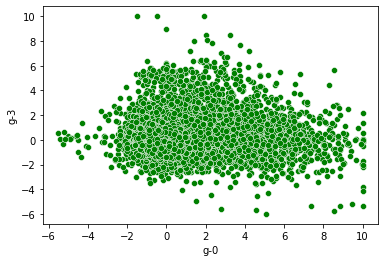

In [19]:

sns.scatterplot(x='g-0', y='g-3', data=dados, color ='green' )

In [15]:
dados[['g-0','g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


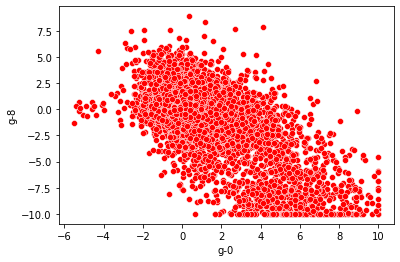

In [23]:
sns.scatterplot(x='g-0', y='g-8', data=dados, color ='red' )
#a nuvem parece estar inclinada com uma inclinacao negativa, quanto maior um menor o outro. 

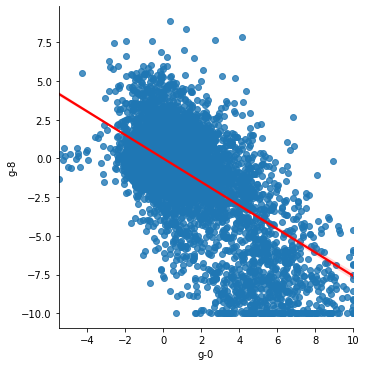

In [31]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})
#quando x0 esta aumentando o x8 esta diminuindo. Podemos ver uma relacao. 

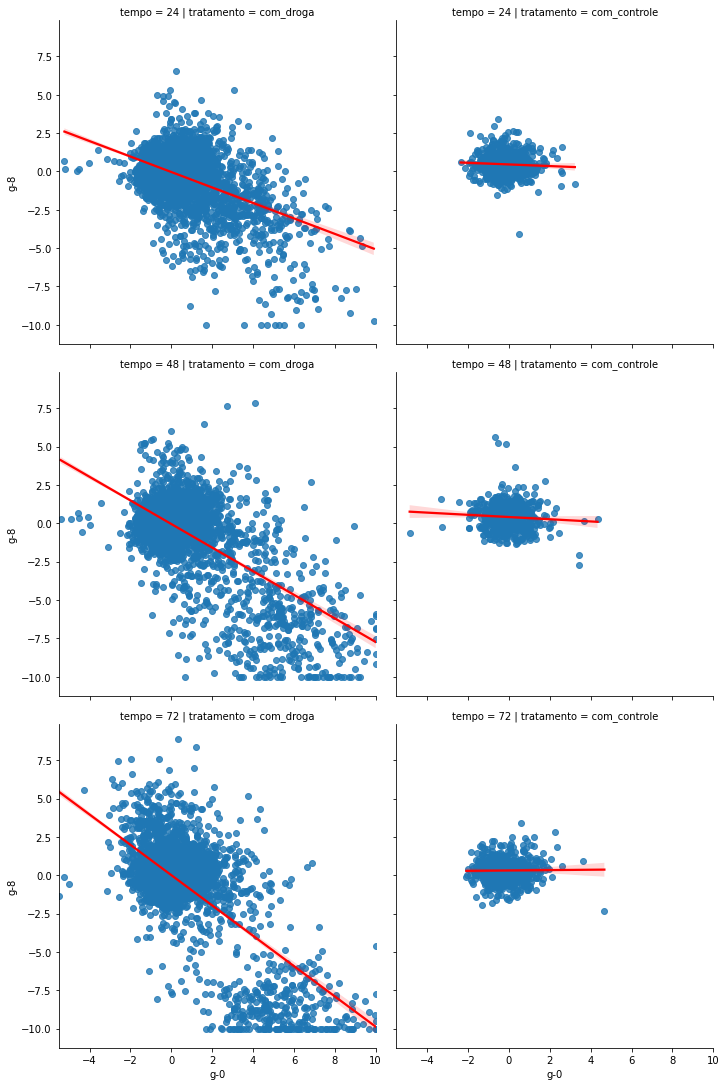

In [35]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')
# Com droga é porque recebeu com composto e sem controle é sem composto. 


####Podemos ver que o controle não apresenta grandes mudanças. É muito interessante observar essa relação entre as váriaveis. 

Outra medida para analisar como as variáveis estão associadas é a correlação. 

Para isso, vamos usar uma função já conhecida do Pandas, o ```loc``` e, vamos agregar o ```.corr```. O ```loc``` serve para definirmos o intervalo em que a correlação vai ser calculada. Aqui, estamos calculando a correlação entre todos os genes. 

Como retorno, temos uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1.
Por exemplo, o primeiro valor numérico apresentado na primeira linha é o resultado da correlação entre a variável que está nesta linha e nesta coluna, no nosso caso, o ```g-0``` em ambas as extremidades. No primeiro valor numérico apresentado na segunda linha, temos a correlação entre ```g-1``` e ```g-0``` e assim por diante. 

Mas, como interpretar esses valores? Bom, temos a seguinte divisão:
    
    - Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
    - Valores muito próximos de 0: variáveis pouco ou não correlacionadas

E, o que diferencia se essa correlação será proporcional ou inversamente proporcional, será o sinal. Quer dizer:

    - Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
    - Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

Agora que já sabemos como analisar essa tabela, podemos voltar para o nosso gráfico de dispersão construído com ```g-0``` e ```g-8`` e perceber que a nossa tabela confirma que ambas as variáveis estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado na tabela é de -0,604212.

In [37]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0

Analisar essa grande tabela é um desafio bem grande. Então, como auxílio visual costumamos plotar um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

E, como esse código já está construído na própria documentação do Seaborn, vamos copiar o [código](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) de lá, fazendo apenas algumas pequenas alterações.

Então, de ```corr = d.corr()``` mudamos para ```corr = dados.loc[:,'g-0':'g-50'].corr()``` pois ajustamos o ```d``` para a nossa base de dados (```dados```) e decidimos incluir um ```loc``` para fazer o mapa de calor apenas do ```g-0``` ao ```g-50```. 
Também retiramos o parâmetro ```vmax=.3``` da última parte do código pois este era um limitador da correlação que não nos interessa no momento.

Adicionalmente, também fizemos a importação da biblioteca Numpy que é usada para gerar este mapa de calor (```import numpy as np```).





O mapa de calor mostra uma escala de cores em sua lateral direita, a legenda e, para cada pontinho, podemos perceber a força da correlação sendo mostrada através de uma cor associada.

Olhando para o nosso gráfico, percebemos que, em sua maioria, as expressões genicas não apresentam correlações tão altas entre si (podemos deduzir isso observando que o gráfico em grande parte é translúcido).

É importante destacar que não podemos inferir causalidade a partir da correlação, como já descrevemos anteriormente no gráfico de dispersão. 
Exemplificando: vimos que ```g-0``` e ```g-8``` têm correlação inversamente proporcional entre si mas não podemos concluir que é o ```g-0``` que faz o ```g-8``` diminuir, ou seja, a causa.

In [40]:
import numpy as np



In [44]:
corr = dados.loc[:,'g-0':'g-50'].corr()

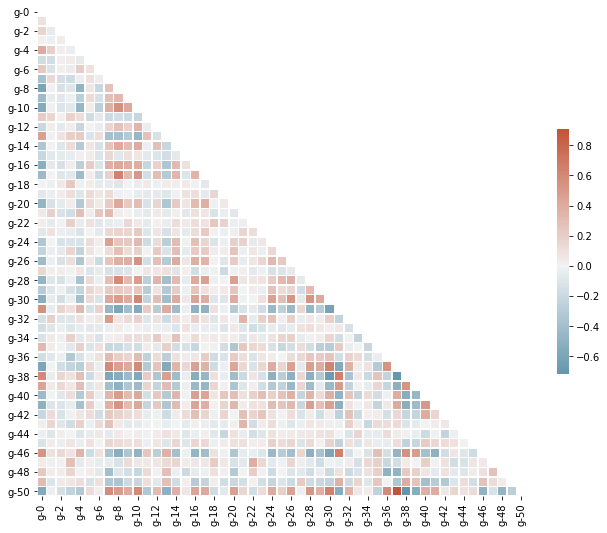

In [45]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlação não significa causalidade. Correlação alta será uma pista para uma investigação mais profunda. 

In [49]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()
# o valor dentro da coluna "c" é a viabilidade celular. Quantas celulas sobreviveram ao tratamento. 

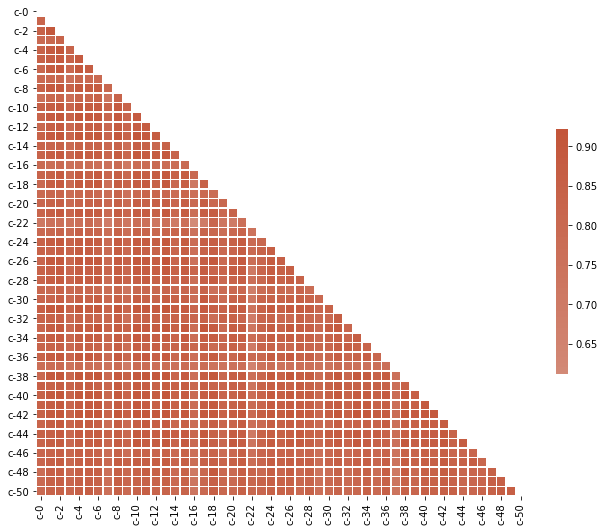

In [48]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Aula 03

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

###Desafio 02: Normalizar o crosstab pela coluna.

###Desafio 03: Explorar outros agregadores.

###Desafio 04: Explorar o melt.

###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

###Desafio 07: Resumo do que você aprendeu com os dados

### Desafio 1
Após algumas pesquisas a respeito desse novo modo de criar tabelas encontrei que ambas as funções funcionam de maneira semelhante. 

In [50]:
dados.groupby([dados['tratamento'],dados['tempo']],sort = True).mean()

g-0       g-1       g-2  ...      c-97      c-98      c-99
tratamento   tempo                                ...                              
com_controle 24    -0.119637 -0.340647  0.241432  ...  0.156828  0.241622  0.226405
             48    -0.058786 -0.239302 -0.084079  ...  0.230692  0.325725  0.318349
             72    -0.113108 -0.269072 -0.264560  ...  0.093519  0.290589  0.242814
com_droga    24     0.241695 -0.126326  0.383142  ... -0.261335 -0.297678 -0.202118
             48     0.318944 -0.075769  0.148428  ... -0.442619 -0.563793 -0.355848
             72     0.269890 -0.037771 -0.024805  ... -0.567086 -0.740223 -0.490057

[6 rows x 872 columns]

####Desafio 2 
Normalizando o crosstab pela coluna. 

In [51]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

####Desafio 3 explorando outros agregadores tais como: max, min e sum 


In [52]:
pd.crosstab(dados['tratamento'], dados['dose'], values=dados['g-0'], aggfunc='max')

dose,D1,D2
tratamento,,
com_controle,3.423,4.67
com_droga,10.000,10.00


In [53]:
pd.crosstab(dados['tratamento'], dados['dose'], values=dados['g-0'], aggfunc='min')

dose,D1,D2
tratamento,,
com_controle,-3.276,-4.859
com_droga,-5.420,-5.513


In [56]:
pd.crosstab(dados['tratamento'], dados['dose'], values=dados['g-0'], aggfunc='sum')

dose,D1,D2
tratamento,,
com_controle,-208.5395,28.7242
com_droga,4004.1808,2090.2294


###Desafio 04: Explorando o melt 


In [61]:
gmelt = pd.melt(dados,['dose','tempo'],['tratamento'])
gmelt.pivot_table(index=['dose','tempo','value'], aggfunc='size').unstack(2)

value       com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

#### Desafio 5: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

In [62]:
correlacao = pd.concat([dados.loc[:, 'g-0':'g-50'], dados.loc[:, 'c-0':'c-50']], axis=1)
corre = correlacao.corr().loc['c-0':'c-50','g-0':'g-50']
corre

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
c-0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,0.586035,-0.231425,0.345752,-0.455353,0.468143,0.041219,0.568077,0.511811,-0.032060,0.078310,0.443028,0.108853,0.085712,0.152211,0.456591,0.330978,0.496350,-0.177204,0.558456,0.367153,0.656611,-0.692572,0.211714,-0.084536,0.256107,-0.269916,0.145813,0.626157,-0.755459,-0.528145,0.585588,0.654305,0.226774,0.012347,-0.006908,0.210940,-0.633990,0.047621,-0.107011,-0.403137,0.611912
c-1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,0.643461,-0.270409,0.361244,-0.483859,0.478114,0.056521,0.564153,0.509560,-0.071016,0.029949,0.368740,0.144788,0.078909,0.167012,0.478737,0.292106,0.508493,-0.158347,0.580010,0.383963,0.703746,-0.695461,0.277929,-0.036666,0.208706,-0.200159,0.282088,0.705889,-0.794085,-0.537176,0.544116,0.592208,0.181589,0.050491,0.000730,0.192941,-0.613219,0.033734,-0.187544,-0.337382,0.704723
c-2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,0.640281,-0.276064,0.357949,-0.491421,0.484984,0.072825,0.587143,0.511541,-0.058010,0.041212,0.407185,0.125998,0.062507,0.160576,0.499975,0.304229,0.550255,-0.170310,0.580436,0.390478,0.722014,-0.708771,0.287357,-0.042537,0.231382,-0.243065,0.263756,0.720190,-0.819262,-0.562878,0.564072,0.617132,0.193366,0.039057,0.004341,0.206352,-0.634068,0.036176,-0.202502,-0.360132,0.716797
c-3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,0.587696,-0.232065,0.330601,-0.450723,0.475338,0.049883,0.555897,0.488323,-0.020933,0.076050,0.395583,0.123346,0.096140,0.172537,0.453716,0.295243,0.513194,-0.177194,0.507051,0.347568,0.646316,-0.672488,0.289150,-0.122636,0.270989,-0.253685,0.186842,0.655762,-0.763876,-0.527457,0.581430,0.574062,0.232262,0.029301,-0.037684,0.218353,-0.578463,0.087801,-0.154966,-0.396029,0.646285
c-4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,0.622138,-0.260521,0.375820,-0.454998,0.491743,0.061464,0.573910,0.494453,-0.068624,0.015357,0.409882,0.147165,0.058114,0.168337,0.509640,0.304879,0.554534,-0.144067,0.553227,0.376674,0.707700,-0.694870,0.303024,-0.077581,0.303429,-0.237223,0.250828,0.706684,-0.818646,-0.549565,0.539012,0.589616,0.184286,0.032884,0.016416,0.213496,-0.618453,0.074328,-0.201262,-0.342652,0.709274
c-5,-0.629189,-0.004664,-0.170701,-0.054947,-0.384914,0.203880,-0.080601,0.537956,0.591920,0.460828,0.613657,-0.245630,0.368931,-0.461652,0.490987,0.031800,0.575351,0.508571,-0.075409,0.036808,0.418791,0.134489,0.037112,0.155087,0.496035,0.320317,0.535907,-0.178679,0.546589,0.395389,0.709453,-0.711380,0.291776,-0.083171,0.279156,-0.273290,0.220133,0.691303,-0.811158,-0.561923,0.573298,0.583448,0.200182,0.036772,0.006386,0.225782,-0.631966,0.042808,-0.142781,-0.392724,0.694375
c-6,-0.669697,-0.027941,-0.181008,-0.118651,-0.364633,0.192688,-0.077305,0.588667,0.607309,0.488941,0.650045,-0.282713,0.354224,-0.498800,0.455535,0.091079,0.570538,0.497299,-0.092479,0.019807,0.415082,0.142910,0.004070,0.162605,0.498251,0.277973,0.546202,-0.140555,0.576697,0.380113,0.718771,-0.698843,0.304389,-0.001378,0.225531,-0.252380,0.313368,0.751720,-0.825922,-0.555425,0.518075,0.595558,0.195119,0.058661,0.023676,0.189452,-0.622929,-0.008706,-0.271243,-0.368203,0.747266
c-7,-0.608954,-0.003155,-0.175473,-0.031232,-0.378776,0.175350,-0.095393,0.489653,0.579543,0.435394,0.574881,-0.184898,0.338342,-0.426301,0.459331,0.053212,0.542742,0.489527,-0.039252,0.052146,0.442555,0.093663,0.044714,0.143705,0.436155,0.336620,0.492387,-0.168127,0.529278,0.324712,0.643149,-0.647587,0.209278,-0.083817,0.243777,-0.280558,0.163984,0.626102,-0.740234,-0.510875,0.5544

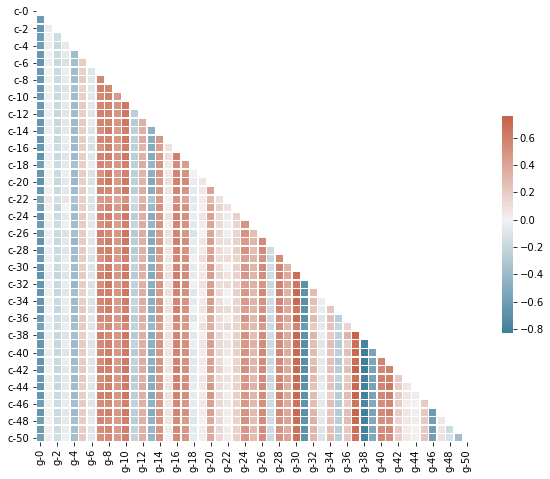

In [66]:
mask = np.triu(np.ones_like(corre, dtype=bool))
f, ax = plt.subplots(figsize=(11, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corre, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

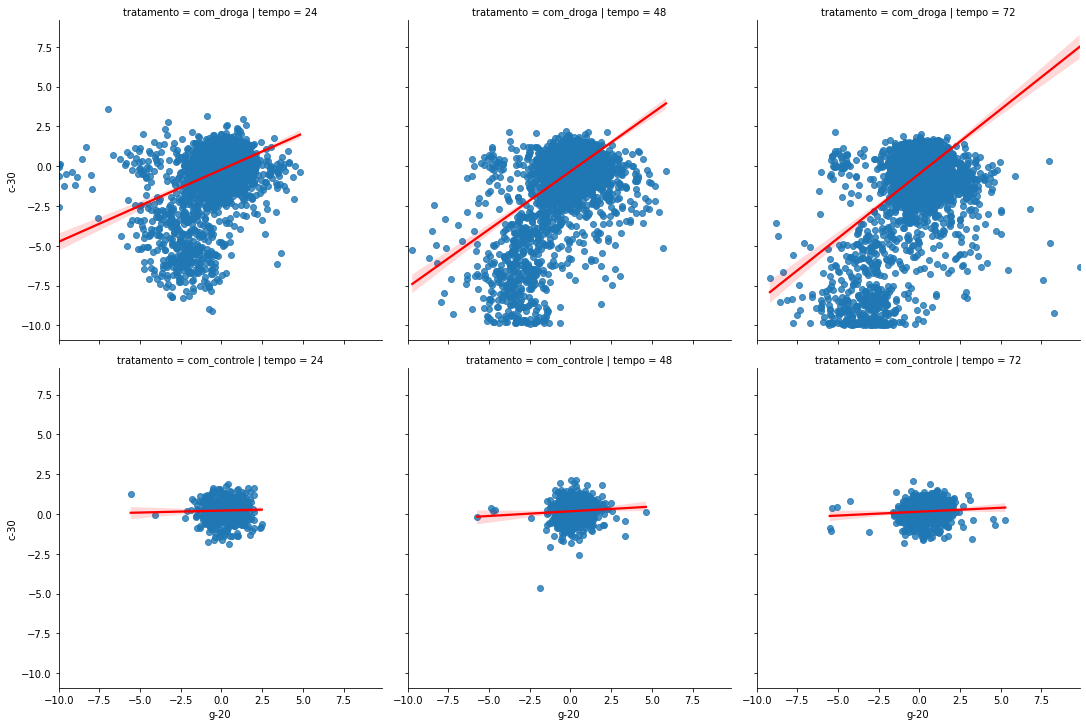

In [67]:
sns.lmplot(x='g-20',y='c-30',data=dados, line_kws={ 'color': 'red' }, col='tempo', row='tratamento')

####Após esse recurso para avaliação é possível observar que existem faixas diferentes de correlação no gráfico. 